In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [86]:
data1 = pd.read_csv('data1.csv', header=None)
data1.head()

,0,1,2
0,-0.69736,-3.6535,1
1,-4.82200,-7.6336,1
2,-8.23430,-7.5536,1
3,-6.07640,-11.3800,1
4,-10.73600,-14.3760,1


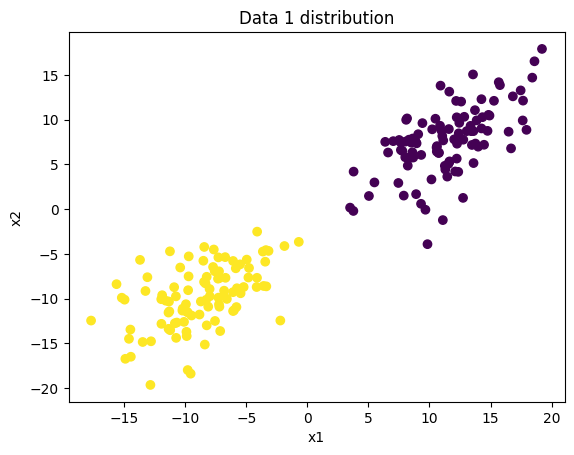

In [87]:
plt.scatter(data1[0], data1[1], c=data1[2])
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Data 1 distribution')
plt.show()

In [88]:
data1_x = data1[[0, 1]]
data1_y = data1[2]

data1_y.value_counts()

2
1    100
0    100
Name: count, dtype: int64

In [89]:
feats_cov = data1_x.cov()
feats_cov_inv = np.linalg.inv(feats_cov)
feats_cov_inv

array([[ 0.08031716, -0.08515476],
       [-0.08515476,  0.10144143]])

In [90]:
data1_x_0 = data1_x[data1_y == 0]
data1_x_1 = data1_x[data1_y == 1]

p_0 = len(data1_x_0) / len(data1_x)
p_1 = len(data1_x_1) / len(data1_x)

mean_0 = data1_x_0.mean()
mean_1 = data1_x_1.mean()

In [91]:
w = np.dot((mean_1 - mean_0), feats_cov_inv)
w_0 = np.log(p_1 / p_0) - 0.5 * np.dot(np.dot(mean_1, feats_cov_inv), mean_1) + 0.5 * np.dot(np.dot(mean_0, feats_cov_inv), mean_0)

In [92]:
def get_performance_measure(y, pred):
    tp, tn, fp, fn = 0, 0, 0, 0
    for i in range(len(y)):
        if y[i] == 1 and pred[i] == 1:
            tp += 1
        elif y[i] == 0 and pred[i] == 0:
            tn += 1
        elif y[i] == 0 and pred[i] == 1:
            fp += 1
        elif y[i] == 1 and pred[i] == 0:
            fn += 1
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    spec = tn / (tn + fp)
    return {'tp': tp,
            'tn': tn,
            'fp': fp,
            'fn': fn,
            'precision': precision,
            'recall': recall,
            'spec': spec,
            'f1': 2 * precision * recall / (precision + recall)}

pred_prob = np.dot(data1_x, w) + w_0
pred = [1 if i > 0 else 0 for i in pred_prob]
pf = get_performance_measure(data1_y, pred)
pf

{'tp': 100,
 'tn': 100,
 'fp': 0,
 'fn': 0,
 'precision': 1.0,
 'recall': 1.0,
 'spec': 1.0,
 'f1': 1.0}

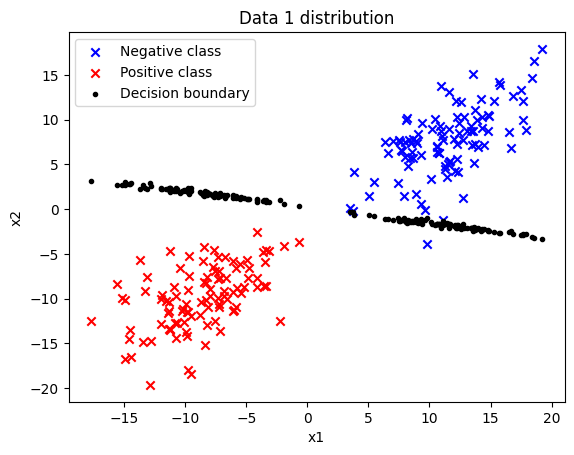

In [93]:
plt.scatter(data1_x_0[0], data1_x_0[1], c='b', marker='x', label='Negative class')
plt.scatter(data1_x_1[0], data1_x_1[1], c='r', marker='x', label='Positive class')
plt.scatter(data1[0], pred_prob, c='black', marker='.', label='Decision boundary')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.title('Data 1 distribution')
plt.show()